In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
%run RNA_pop_v6.py

# Load Data

In [47]:
def het(N, t):
    return 0.5 * (1.-1/(2.*N))**t

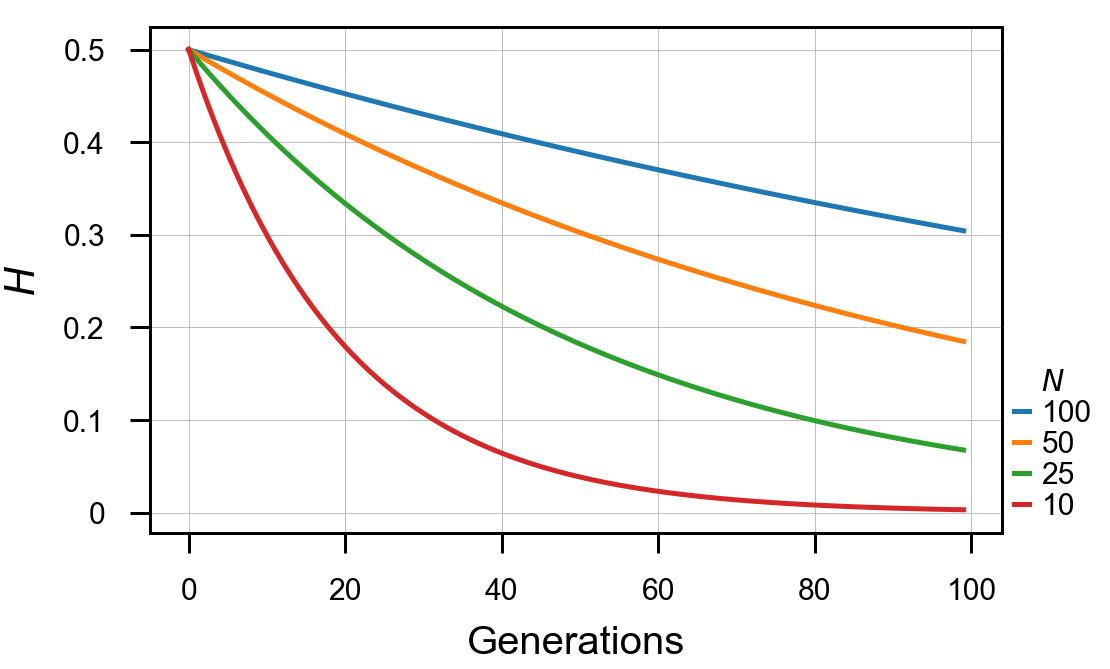

In [70]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.grid(True)#, color='#9E9E9E')

x = np.arange(0, 100, 1)

#y = np.arange(0, 51, 1)
ax.errorbar(x, [het(100, i) for i in x], lw=5, label=r'100')
ax.errorbar(x, [het(50, i) for i in x], lw=5, label=r'50')
ax.errorbar(x, [het(25, i) for i in x], lw=5, label=r'25')
ax.errorbar(x, [het(10, i) for i in x], lw=5, label=r'10')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'$H$', fontsize= 40, labelpad=20)
plt.xlabel(r'Generations', fontsize= 40, labelpad=20)
plt.tight_layout()

plt.yticks(np.linspace(0, 0.5, 6), ['0', '0.1', 0.2, 0.3, 0.4, 0.5])


#plt.ylim(0, 0.2)
#plt.xlim(-0.5, 40.5)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc=(1,0), fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$N$', fancybox=False, edgecolor='white')
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/neutral2.png', bbox_inches='tight', dpi=300)

In [3]:
%cd ~/Desktop/

/Users/Amfortas/Desktop


In [4]:
%ls RNA_stats_21Nov18/

bp_12_N_1000_u_0.001_r_0.0_m_0.0/ bp_12_N_100_u_0.001_r_0.2_m_0.0/  bp_12_N_100_u_0.001_r_1.0_m_0.0/
bp_12_N_100_u_0.001_r_0.0_m_0.0/  bp_12_N_100_u_0.001_r_0.5_m_0.0/  bp_12_N_10_u_0.001_r_0.0_m_0.0/


In [6]:
data_set_pop = {}
for i in [0.0, 0.2, 0.5, 1.0]:
    path  =  '/Users/Amfortas/Desktop/RNA_stats_21Nov18/bp_12_N_100_u_0.001_r_'+ str(i) +'_m_0.0/'
    stat_pop = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            stat_pop[count] = run
            file.close()
            count += 1
    data_set_pop[i] = stat_pop

In [13]:
1. - np.array(data_set_pop[0.0][0]['rec_load'])/100.

array([0.   , 0.05 , 0.075, 0.07 , 0.175, 0.24 , 0.19 , 0.12 , 0.11 ,
       0.03 , 0.04 , 0.095, 0.38 , 0.345, 0.265])

In [7]:
ind = [0.0, 0.2, 0.5, 1.0]

D_pop = {}
for i in ind:
    div = []
    for j in data_set_pop[i].keys():
         div.append(data_set_pop[i][j]['divergence'])
    div = np.array(div)
    D_pop[i] = div
    
sDMI_pop = {}
for i in ind:
    single = []
    for j in data_set_pop[i].keys():
        single.append(data_set_pop[i][j]['single'])
    sDMI_pop[i] = np.array(single)
    
dDMI_pop = {}
for i in ind:
    double = []
    for j in data_set_pop[i].keys():
        double.append(data_set_pop[i][j]['double'])
    dDMI_pop[i] = np.array(double)
    
tDMI_pop = {}
for i in ind:
    triple = []
    for j in data_set_pop[i].keys():
        triple.append(data_set_pop[i][j]['triple'])
    tDMI_pop[i] = np.array(triple)
    
holeyness_pop = {}
for i in ind:
    triple = []
    for j in data_set_pop[i].keys():
        triple.append(np.divide(data_set_pop[i][j]['holeyness'], 300.))
    holeyness_pop[i] = np.array(triple)
    
rec_load_pop = {}
for i in ind:
    triple = []
    for j in data_set_pop[i].keys():
        triple.append(1. - np.divide(data_set_pop[i][j]['rec_load'], 100.))
    rec_load_pop[i] = np.array(triple)

In [29]:
segDMI = {}
for i in ind:
    seg = []
    for j in data_set_pop[i].keys():
        a = np.array(data_set_pop[i][j]['single_seg'])
        b = np.array(data_set_pop[i][j]['double_seg'])
        c = np.array(data_set_pop[i][j]['triple_seg'])
        total = a + b + c
        seg.append(total)
    segDMI[i] = np.array(seg)

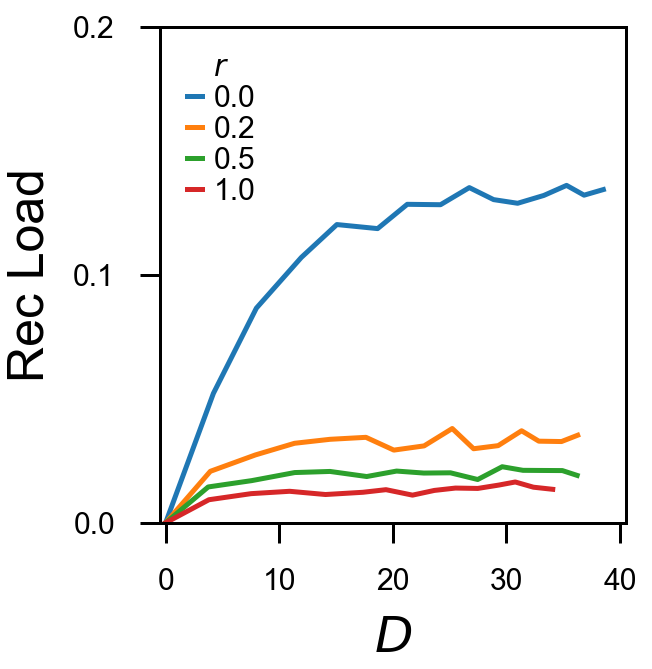

In [16]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True)#, color='#9E9E9E')

#ax.set_facecolor('#E0E0E0')
        
ind = [0.0, 0.2, 0.5, 1.0]

ax.errorbar(np.mean(D_pop[ind[0]], axis=0), np.mean(rec_load_pop[ind[0]], axis=0), lw=5, label=str(ind[0]))
ax.errorbar(np.mean(D_pop[ind[1]], axis=0), np.mean(rec_load_pop[ind[1]], axis=0), lw=5, label=str(ind[1]))
ax.errorbar(np.mean(D_pop[ind[2]], axis=0), np.mean(rec_load_pop[ind[2]], axis=0), lw=5, label=str(ind[2]))
ax.errorbar(np.mean(D_pop[ind[3]], axis=0), np.mean(rec_load_pop[ind[3]], axis=0), lw=5, label=str(ind[3]))
#ax.errorbar(np.mean(D[0.5], axis=0), np.mean(holeyness[0.5], axis=0), lw=5, label=r'0.5')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$r$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'Rec Load', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

plt.yticks(np.linspace(0, 0.2, 3))#, ['0'] + list(np.arange(0, 1, 0.20))[1:])


plt.ylim(0, 0.2)
plt.xlim(-0.5, 40.5)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_figs/rec_load_r.png', bbox_inches='tight', dpi=300)

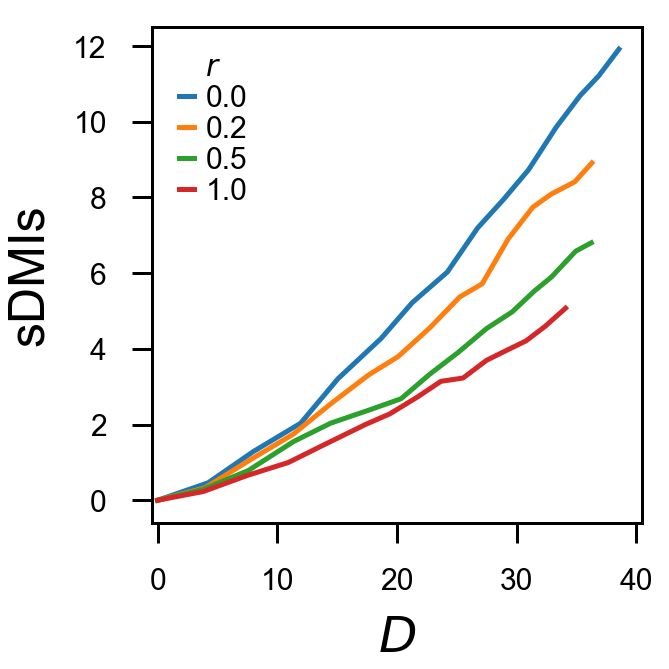

In [36]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True)#, color='#9E9E9E')

#ax.set_facecolor('#E0E0E0')
        
ind = [0.0, 0.2, 0.5, 1.0]

ax.errorbar(np.mean(D_pop[ind[0]], axis=0), np.mean(sDMI_pop[ind[0]], axis=0), lw=5, label=str(ind[0]))
ax.errorbar(np.mean(D_pop[ind[1]], axis=0), np.mean(sDMI_pop[ind[1]], axis=0), lw=5, label=str(ind[1]))
ax.errorbar(np.mean(D_pop[ind[2]], axis=0), np.mean(sDMI_pop[ind[2]], axis=0), lw=5, label=str(ind[2]))
ax.errorbar(np.mean(D_pop[ind[3]], axis=0), np.mean(sDMI_pop[ind[3]], axis=0), lw=5, label=str(ind[3]))
#ax.errorbar(np.mean(D[0.5], axis=0), np.mean(holeyness[0.5], axis=0), lw=5, label=r'0.5')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$r$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'sDMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

#plt.yticks(np.linspace(0, 0.2, 3))#, ['0'] + list(np.arange(0, 1, 0.20))[1:])


#plt.ylim(0, 0.2)
plt.xlim(-0.5, 40.5)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_figs/sDMIs_r.png', bbox_inches='tight', dpi=300)

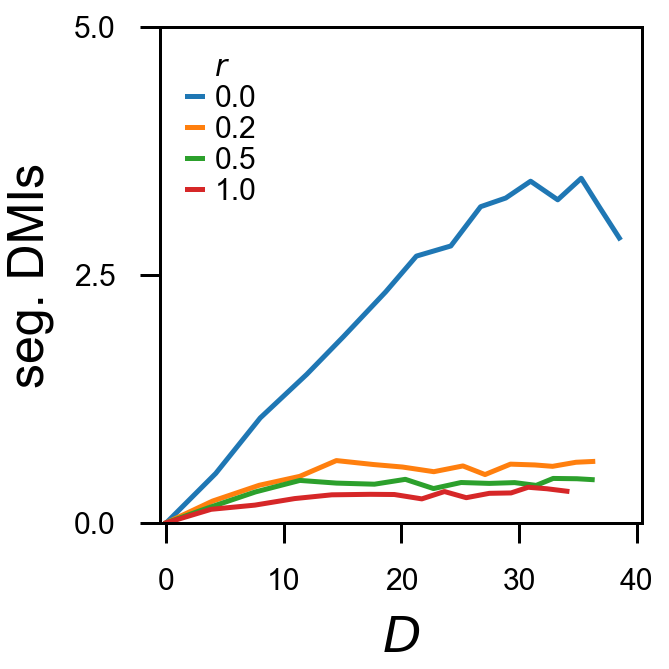

In [33]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True)#, color='#9E9E9E')

#ax.set_facecolor('#E0E0E0')
        
ind = [0.0, 0.2, 0.5, 1.0]

ax.errorbar(np.mean(D_pop[ind[0]], axis=0), np.mean(segDMI[ind[0]], axis=0), lw=5, label=str(ind[0]))
ax.errorbar(np.mean(D_pop[ind[1]], axis=0), np.mean(segDMI[ind[1]], axis=0), lw=5, label=str(ind[1]))
ax.errorbar(np.mean(D_pop[ind[2]], axis=0), np.mean(segDMI[ind[2]], axis=0), lw=5, label=str(ind[2]))
ax.errorbar(np.mean(D_pop[ind[3]], axis=0), np.mean(segDMI[ind[3]], axis=0), lw=5, label=str(ind[3]))
#ax.errorbar(np.mean(D[0.5], axis=0), np.mean(holeyness[0.5], axis=0), lw=5, label=r'0.5')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$r$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'seg. DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

plt.yticks(np.linspace(0, 5, 3))#, ['0'] + list(np.arange(0, 1, 0.20))[1:])


plt.ylim(0, 5)
plt.xlim(-0.5, 40.5)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_figs/segDMIs_r.png', bbox_inches='tight', dpi=300)

In [5]:
data_set = {}
for i in [0.0, 0.5, 1.0]:
    path  =  '/Users/Amfortas/Desktop/holeyness/Nov2018/bp_12_N_100_u_0.001_r_'+ str(i) +'_m_0.0/'
    stat_pop = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            stat_pop[count] = run
            file.close()
            count += 1
    data_set[i] = stat_pop

In [6]:
D = {}
for i in [0.0, 0.5, 1.0]:
    div = []
    for j in data_set[i].keys():
         div.append(data_set[i][j]['divergence'])
    div = np.array(div)
    D[i] = div

In [7]:
sDMI = {}
for i in [0.0, 0.5, 1.0]:
    single = []
    for j in data_set[i].keys():
        single.append(data_set[i][j]['single'])
    sDMI[i] = np.array(single)

In [8]:
dDMI = {}
for i in [0.0, 0.5, 1.0]:
    double = []
    for j in data_set[i].keys():
        double.append(data_set[i][j]['double'])
    dDMI[i] = np.array(double)

In [9]:
tDMI = {}
for i in [0.0, 0.5, 1.0]:
    triple = []
    for j in data_set[i].keys():
        triple.append(data_set[i][j]['triple'])
    tDMI[i] = np.array(triple)

In [10]:
holeyness = {}
for i in [0.0, 0.5, 1.0]:
    triple = []
    for j in data_set[i].keys():
        triple.append(np.divide(data_set[i][j]['holeyness'], 300.))
    holeyness[i] = np.array(triple)

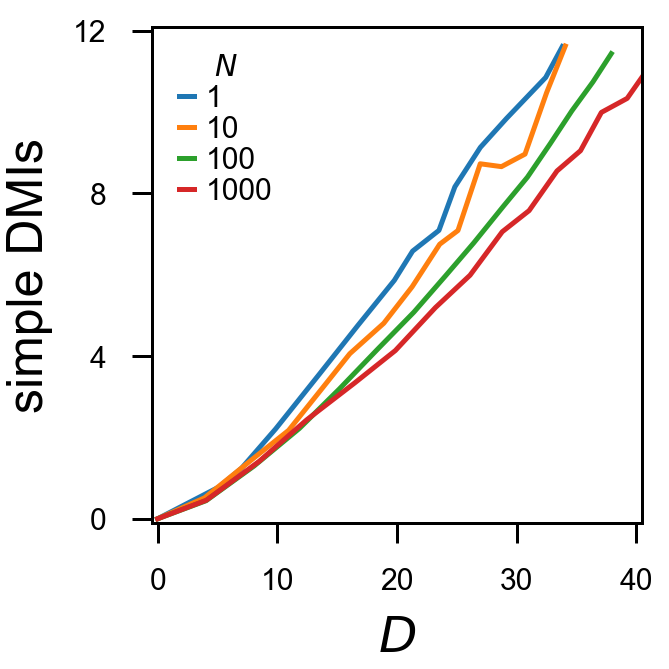

In [60]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True, linewidth=3, color='lightgrey')

#ax.set_facecolor('snow')
        
ax.errorbar(np.mean(D_pop[1], axis=0), np.mean(sDMI_pop[1], axis=0), lw=5, label=r'1')
ax.errorbar(np.mean(D_pop[10], axis=0), np.mean(sDMI_pop[10], axis=0), lw=5, label=r'10')
ax.errorbar(np.mean(D_pop[100], axis=0), np.mean(sDMI_pop[100], axis=0), lw=5, label=r'100')
ax.errorbar(np.mean(D_pop[1000], axis=0), np.mean(sDMI_pop[1000], axis=0), lw=5, label=r'1000')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$N$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'simple DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

plt.yticks(np.arange(0, 14, 4))

plt.ylim(-0.1, 12.1)
plt.xlim(-0.5, 40.5)

#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_res/N_pops.png', bbox_inches='tight', dpi=300)

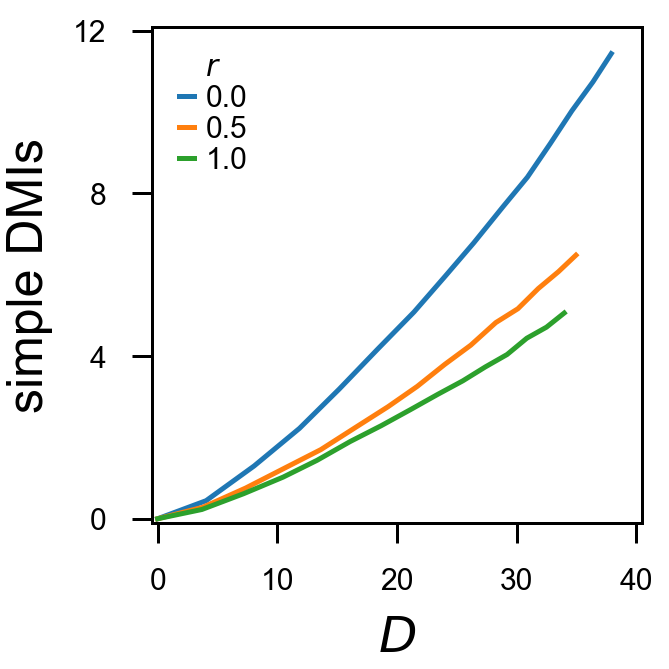

In [57]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True, linewidth=3, color='lightgrey')

#ax.set_facecolor('snow')
        
ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
ax.errorbar(np.mean(D[0.5], axis=0), np.mean(sDMI[0.5], axis=0), lw=5, label=r'0.5')
ax.errorbar(np.mean(D[1.0], axis=0), np.mean(sDMI[1.0], axis=0), lw=5, label=r'1.0')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$r$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'simple DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

plt.yticks(np.arange(0, 14, 4))

plt.ylim(-0.1, 12.1)
plt.xlim(-0.5, 40.5)

#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_res/r_pops.png', bbox_inches='tight', dpi=300)

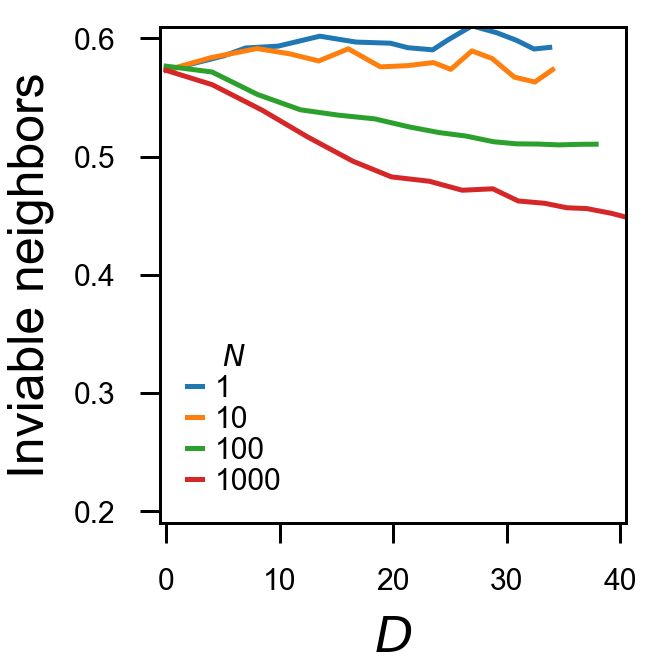

In [61]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True)#, color='#9E9E9E')

#ax.set_facecolor('#E0E0E0')
        
ax.errorbar(np.mean(D_pop[1], axis=0), np.mean(holeyness_pop[1], axis=0), lw=5, label=r'1')
ax.errorbar(np.mean(D_pop[10], axis=0), np.mean(holeyness_pop[10], axis=0), lw=5, label=r'10')
ax.errorbar(np.mean(D_pop[100], axis=0), np.mean(holeyness_pop[100], axis=0), lw=5, label=r'100')
ax.errorbar(np.mean(D_pop[1000], axis=0), np.mean(holeyness_pop[1000], axis=0), lw=5, label=r'1000')
#ax.errorbar(np.mean(D[0.5], axis=0), np.mean(holeyness[0.5], axis=0), lw=5, label=r'0.5')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$N$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'Inviable neighbors', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

plt.yticks(np.arange(0.2, 0.7, 0.10))#, ['0'] + list(np.arange(0, 1, 0.20))[1:])


plt.ylim(0.19, 0.61)
plt.xlim(-0.5, 40.5)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_res/holeyness_N.png', bbox_inches='tight', dpi=300)

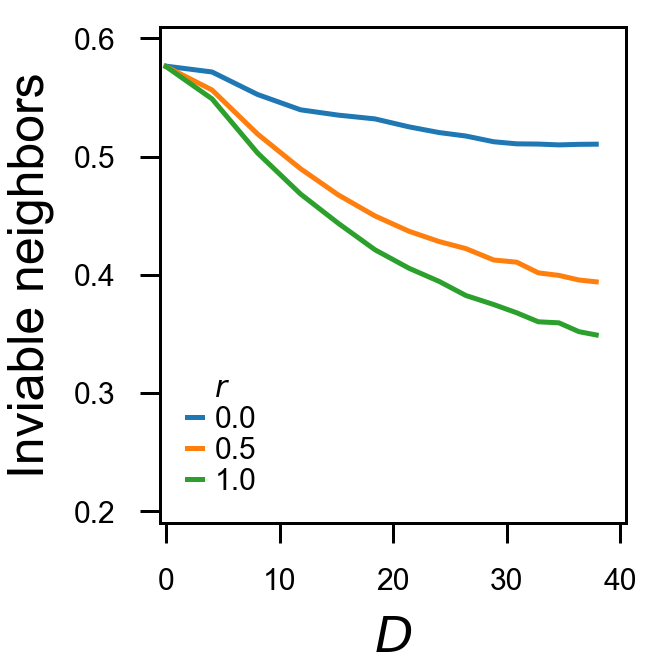

In [56]:
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 30})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.grid(True)#, color='#9E9E9E')

#ax.set_facecolor('#E0E0E0')
        
ax.errorbar(np.mean(D[0.0], axis=0), np.mean(holeyness[0.0], axis=0), lw=5, label=r'0.0')
ax.errorbar(np.mean(D[0.0], axis=0), np.mean(holeyness[0.5], axis=0), lw=5, label=r'0.5')
ax.errorbar(np.mean(D[0.0], axis=0), np.mean(holeyness[1.0], axis=0), lw=5, label=r'1.0')
#ax.errorbar(np.mean(D[0.5], axis=0), np.mean(holeyness[0.5], axis=0), lw=5, label=r'0.5')
#ax.errorbar(np.mean(D[0.05], axis=0), np.mean(sDMI[0.05], axis=0), lw=5, label=r'0.05')
#ax.errorbar(np.mean(D[0.0], axis=0), np.mean(sDMI[0.0], axis=0), lw=5, label=r'0.0')
#ax.errorbar(np.mean(D_u[100], axis=0), np.mean(sDMI_u[100], axis=0), lw=5, label='asexual')
#ax[0].errorbar(np.mean(D[0.1], axis=0), np.mean(tDMI[0.1], axis=0), lw=5, label='trible')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$r$', fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'Inviable neighbors', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)
plt.tight_layout()

plt.yticks(np.arange(0.2, 0.7, 0.10))#, ['0'] + list(np.arange(0, 1, 0.20))[1:])


plt.ylim(0.19, 0.61)
plt.xlim(-0.5, 40.5)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/RNA_pop_res/holeyness_r.png', bbox_inches='tight', dpi=300)

In [ ]:
data_set_u = {}
for i in [100]:
    path  =  '/Users/Amfortas/Desktop/RNA_stats_Nov18/Nov18/bp_12_N_'+ str(i) +'_u_0.001_r_0.0_m_0.0_t_700/'
    stat_pop = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            stat_pop[count] = run
            file.close()
            count += 1
    data_set_u[i] = stat_pop

In [ ]:
D_u = {}
for i in [100]:
    div = []
    for j in data_set_u[i].keys():
         div.append(data_set_u[i][j]['divergence'])
    div = np.array(div)
    D_u[i] = div

In [ ]:
sDMI_u = {}
for i in [100]:
    single = []
    for j in data_set_u[i].keys():
        single.append([len(l) for l in data_set_u[i][j]['single']])
    sDMI_u[i] = np.array(single)

In [ ]:
dDMI = {}
for i in [1, 10, 100, 1000]:
    double = []
    for j in data_set[i].keys():
        double.append([len(l) for l in data_set[i][j]['double']])
    dDMI[i] = np.array(double)

In [ ]:
tDMI = {}
for i in [1, 10, 100, 1000]:
    triple = []
    for j in data_set[i].keys():
        triple.append([len(l) for l in data_set[i][j]['triple']])
    tDMI[i] = np.array(triple)

In [ ]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(15, 15))

plt.rcParams.update({'font.size': 20})

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].grid(True)
        if i==0:
            par = False
        else:
            par = True
        ax[i,j].tick_params(axis='x', which='both', bottom=True, top=False,
            labelbottom=par, size=20, width=3, direction='out', pad=25, colors='black')
        ax[i,j].tick_params(axis='y', which='both', left=True, right=False,
            labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
        ax[i,j].spines['right'].set_visible(True)
        ax[i,j].spines['top'].set_visible(True)
        ax[i,j].spines['bottom'].set_visible(True)
        ax[i,j].spines['left'].set_visible(True)
        ax[i,j].spines['left'].set_linewidth(3)
        ax[i,j].spines['bottom'].set_linewidth(3)
        ax[i,j].spines['right'].set_linewidth(3)
        ax[i,j].spines['top'].set_linewidth(3)
        ax[i,j].spines['bottom'].set_color('black')
        ax[i,j].spines['left'].set_color('black')
        ax[i,j].set_ylim(0, 20)
        ax[i,j].set_yticks([0, 5, 10, 15, 20])
        
ax[0,0].errorbar(np.mean(D[1], axis=0), np.mean(sDMI[1], axis=0), lw=5, label='simple')
ax[0,0].errorbar(np.mean(D[1], axis=0), np.mean(dDMI[1], axis=0), lw=5, label='double')
ax[0,0].errorbar(np.mean(D[1], axis=0), np.mean(tDMI[1], axis=0), lw=5, label='trible')

legend = ax[0,0].legend(loc='best', shadow=False, fontsize='medium',framealpha=0.5)

ax[0,0].set_title('N=1', fontsize= 20)

ax[1,0].errorbar(np.mean(D[10], axis=0), np.mean(sDMI[10], axis=0), lw=5)
ax[1,0].errorbar(np.mean(D[10], axis=0), np.mean(dDMI[10], axis=0), lw=5)
ax[1,0].errorbar(np.mean(D[10], axis=0), np.mean(tDMI[10], axis=0), lw=5)

ax[1,0].set_title('N=10', fontsize= 20)

ax[0,1].errorbar(np.mean(D[100], axis=0), np.mean(sDMI[100], axis=0), lw=5)
ax[0,1].errorbar(np.mean(D[100], axis=0), np.mean(dDMI[100], axis=0), lw=5)
ax[0,1].errorbar(np.mean(D[100], axis=0), np.mean(tDMI[100], axis=0), lw=5)

ax[0,1].set_title('N=100', fontsize= 20)

ax[1,1].errorbar(np.mean(D[1000], axis=0), np.mean(sDMI[1000], axis=0), lw=5)
ax[1,1].errorbar(np.mean(D[1000], axis=0), np.mean(dDMI[1000], axis=0), lw=5)
ax[1,1].errorbar(np.mean(D[1000], axis=0), np.mean(tDMI[1000], axis=0), lw=5)

ax[1,1].set_title('N=1000', fontsize= 20)

ax[0,0].set_ylabel('DMIs', fontsize= 20, labelpad=20)
ax[1,0].set_ylabel('DMIs', fontsize= 20, labelpad=20)

ax[1,0].set_xlabel('Hamming distance', fontsize= 20, labelpad=20)
ax[1,1].set_xlabel('Hamming distance', fontsize= 20, labelpad=20)

plt.tight_layout()

plt.savefig('/Users/Amfortas/Desktop/u_1e-3_diff_pops.png', bbox_inches='tight')

In [ ]:
%ls Nov18/Nov18/

In [ ]:
data_set = {}
for i,j in zip([0.001, 0.0001, 1e-5], [700, 7000, 70000]):
    path  =  '/Users/Amfortas/Desktop/Nov18/Nov18/bp_12_N_100_u_'+ str(i) + '_r_0.0_m_0.0_t_' + str(j) + '/'
    stat_pop = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            stat_pop[count] = run
            file.close()
            count += 1
    data_set[i] = stat_pop

In [ ]:
D = {}
for i in [0.001, 0.0001, 1e-5]:
    div = []
    for j in data_set[i].keys():
         div.append(data_set[i][j]['divergence'])
    div = np.array(div)
    D[i] = div

In [ ]:
DMIs = {}
for i in [0.001, 0.0001, 1e-5]:
    single = []
    double = []
    triple = []
    for j in data_set[i].keys():
        single.append([len(l) for l in data_set[i][j]['single']])
        double.append([len(l) for l in data_set[i][j]['double']])
        triple.append([len(l) for l in data_set[i][j]['triple']])
    single = np.array(single)
    double = np.array(double)
    triple = np.array(triple)
    total = np.add(single, double, triple)
    DMIs[i] = total

In [ ]:
sDMI = {}
for i in [0.001, 0.0001, 1e-5]:
    single = []
    for j in data_set[i].keys():
        single.append([len(l) for l in data_set[i][j]['single']])
    sDMI[i] = np.array(single)

In [ ]:
dDMI = {}
for i in [0.001, 0.0001, 1e-5]:
    double = []
    for j in data_set[i].keys():
        double.append([len(l) for l in data_set[i][j]['double']])
    dDMI[i] = np.array(double)

In [ ]:
tDMI = {}
for i in [0.001, 0.0001, 1e-5]:
    triple = []
    for j in data_set[i].keys():
        triple.append([len(l) for l in data_set[i][j]['triple']])
    tDMI[i] = np.array(triple)

In [ ]:
path  =  '/Users/Amfortas/Desktop/RNA_pop_results/Null_model/bp_12/'
stat = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat[count] = run
        file.close()
        count += 1

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))


plt.plot(np.mean(D[0.001], axis=0), np.mean(dDMI[0.001], axis=0), lw=5, label=r'$10^{-3}$')

plt.plot(np.mean(D[0.0001], axis=0), np.mean(dDMI[0.0001], axis=0), lw=5, label=r'$10^{-4}$')

plt.plot(np.mean(D[1e-5], axis=0), np.mean(dDMI[1e-5], axis=0), lw=5, label=r'$10^{-5}$')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'dDMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)

#plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$u$')
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/double_DMIs_u.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))


plt.plot(np.mean(D[0.001], axis=0), np.mean(tDMI[0.001], axis=0), lw=5, label=r'$10^{-3}$')

plt.plot(np.mean(D[0.0001], axis=0), np.mean(tDMI[0.0001], axis=0), lw=5, label=r'$10^{-4}$')

plt.plot(np.mean(D[1e-5], axis=0), np.mean(tDMI[1e-5], axis=0), lw=5, label=r'$10^{-5}$')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'tDMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)

#plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$u$')
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/triplr_DMIs_u.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))


plt.plot(np.mean(D[0.001], axis=0), np.mean(sDMI[0.001], axis=0), lw=5, label=r'$10^{-3}$')

plt.plot(np.mean(D[0.0001], axis=0), np.mean(sDMI[0.0001], axis=0), lw=5, label=r'$10^{-4}$')

plt.plot(np.mean(D[1e-5], axis=0), np.mean(sDMI[1e-5], axis=0), lw=5, label=r'$10^{-5}$')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'sDMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$', fontsize= 50, labelpad=20)

#plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$u$')
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/simple_DMIs_u.png', bbox_inches='tight')

In [ ]:
data_set_r = {}
for i in [0.0001]:
    path  =  '/Users/Amfortas/Desktop/RNA_pop_results/7Sept/Sept2018/bp_12_N_100_u_0.001_r_'+ str(i) + '_m_0.0/'
    stat_pop = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            stat_pop[count] = run
            file.close()
            count += 1
    data_set_r[i] = stat_pop

In [ ]:
D = {}
for i in [0.001, 0.0001, 1e-5]:
    div = []
    for j in data_set[i].keys():
         div.append(data_set[i][j]['divergence'])
    div = np.array(div)
    D[i] = div

In [ ]:
D_r = {}
for i in [0.0001]:
    div = []
    for j in data_set_r[i].keys():
         div.append(data_set_r[i][j]['divergence'])
    div = np.array(div)
    D_r[i] = div

In [ ]:
DMIs = {}
for i in [0.001, 0.0001, 1e-5]:
    single = []
    double = []
    triple = []
    for j in data_set[i].keys():
        single.append([len(l) for l in data_set[i][j]['single']])
        double.append([len(l) for l in data_set[i][j]['double']])
        triple.append([len(l) for l in data_set[i][j]['triple']])
    single = np.array(single)
    double = np.array(double)
    triple = np.array(triple)
    total = np.add(single, double, triple)
    DMIs[i] = total

In [ ]:
DMIs_r = {}
for i in [0.0001]:
    single = []
    double = []
    triple = []
    for j in data_set_r[i].keys():
        single.append([len(l) for l in data_set_r[i][j]['single']])
        double.append([len(l) for l in data_set_r[i][j]['double']])
        triple.append([len(l) for l in data_set_r[i][j]['triple']])
    single = np.array(single)
    double = np.array(double)
    triple = np.array(triple)
    total = np.add(single, double, triple)
    DMIs_r[i] = total

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

plt.plot(np.mean(D[0.001], axis=0), np.mean(DMIs[0.001], axis=0), lw=5, label=r'$10^{-3}$')

plt.plot(np.mean(D[0.0001], axis=0), np.mean(DMIs[0.0001], axis=0), lw=5, label=r'$10^{-4}$')

plt.plot(np.mean(D[1e-5], axis=0), np.mean(DMIs[1e-5], axis=0), lw=5, label=r'$10^{-5}$')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$)', fontsize= 50, labelpad=20)

#plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3, title=r'$u$')
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/test.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

plt.plot(np.mean(D[0.001], axis=0), np.mean(DMIs[0.001], axis=0), lw=5, label=r'$r = 0$')

plt.plot(np.mean(D_r[0.0001], axis=0), np.mean(DMIs_r[0.0001], axis=0), lw=5, label=r'$r = 10^{-4}$')
#plt.plot(np.mean(D[0.0001], axis=0), np.mean(DMIs[0.0001], axis=0), lw=5, label=r'$10^{-4}$')

#plt.plot(np.mean(D[1e-5], axis=0), np.mean(DMIs[1e-5], axis=0), lw=5, label=r'$10^{-5}$')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'$D$)', fontsize= 50, labelpad=20)

#plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
#plt.show()
plt.savefig('/Users/Amfortas/Desktop/test_2.png', bbox_inches='tight')

In [ ]:
D = []
for i in stat_pop.keys():
    D.append(stat_pop[i]['divergence'])
D = np.array(D)

In [ ]:
RI = []
for i in stat.keys():
    RI.append(stat[i]['RI_max'])
RI = np.array(RI)

In [ ]:
single = []
for i in stat.keys():
    single.append([len(j) for j in stat[i]['single']])
single = np.array(single)

In [ ]:
double = []
for i in stat.keys():
    double.append([len(j) for j in stat[i]['double']])
double = np.array(double)

In [ ]:
triple = []
for i in stat.keys():
    triple.append([len(j) for j in stat[i]['triple']])
triple = np.array(triple)

In [ ]:
single_pop = []
for i in stat_pop.keys():
    single_pop.append([len(j) for j in stat_pop[i]['single']])
single_pop = np.array(single_pop)

double_pop = []
for i in stat_pop.keys():
    double_pop.append([len(j) for j in stat_pop[i]['double']])
double_pop = np.array(double_pop)

triple_pop = []
for i in stat_pop.keys():
    triple_pop.append([len(j) for j in stat_pop[i]['triple']])
triple_pop = np.array(triple_pop)

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

plt.plot(np.mean(D, axis=0), lw=5, color='orange')


plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'$D$', fontsize= 50, labelpad=20)
plt.xlabel(r'Generation ($\times 10^{3}$)', fontsize= 50, labelpad=20)


ax.xaxis.label.set_color('black')

ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
plt.title(r'$N=1, u=10^{-4}, r=0, m=0$', fontsize= 40)
#plt.ylim(0, 20)
#plt.xlim(0, 10)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/cluster/data/figs/D_n1000_u1e-5_r1e-5.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

plt.plot(np.mean(RI, axis=0), lw=5)


plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'RI', fontsize= 50, labelpad=20)
plt.xlabel(r'Generation ($\times 10^{3}$)', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 40)
ax.grid(True)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 1.)
#plt.xlim(0, 10)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/cluster/data/figs/RI_n1000_u1e-5_r1e-5.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

plt.plot(np.mean(single, axis=0), lw=5, label='single')

plt.plot(np.mean(double, axis=0), lw=5, label='double')

plt.plot(np.mean(triple, axis=0), lw=5, label='triple')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'Generation ($\times 10^{3}$)', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/cluster/data/figs/DMI_n1000_u1e-5_r1e-5.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

plt.plot(np.mean(single_pop, axis=0), lw=5, label='single')

plt.plot(np.mean(double_pop, axis=0), lw=5, label='double')

plt.plot(np.mean(triple_pop, axis=0), lw=5, label='triple')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'Generation ($\times 10^{3}$)', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-5}, r=0, m=0$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10, 15, 20],[0, r'$2.5$', r'$5$', r'$7.5$', r'$10$'])
#plt.ylim(0, 20)
#plt.xlim(0, 10)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/cluster/data/figs/DMI_n1000_u1e-5_r1e-5.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

err0 = 1.96 * np.std(single_pop, axis=0) / np.sqrt(len(single_pop))
err1 = 1.96 * np.std(double_pop, axis=0) / np.sqrt(len(double_pop))
err2 = 1.96 * np.std(triple_pop, axis=0) / np.sqrt(len(triple_pop))
err_x = 1.96 * np.std(D, axis=0) / np.sqrt(len(D))

plt.errorbar(np.mean(D, axis=0), np.mean(single_pop, axis=0), xerr=err_x, yerr=err0, fmt='o',\
             markersize=10, mew=0.01, elinewidth=3, zorder=2, label='single')
#plt.plot(np.mean(single, axis=0)[:20], lw=5, zorder=1)

#err = 1.96* np.std(single, axis=0)[:22]/ np.sqrt(len(single))
#plt.errorbar(np.arange(0, 22, 1), np.mean(single, axis=0)[:22], linewidth=8, zorder=1, color='orange')
#ax.fill_between(np.arange(0, 22, 1),   np.mean(single, axis=0)[:22] - err, np.mean(single, axis=0)[:22] + err, alpha=.2, zorder=2, color='orange')

plt.errorbar(np.mean(D, axis=0), np.mean(double_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='double')

plt.errorbar(np.mean(D, axis=0), np.mean(triple_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='triple')

#plt.plot(np.mean(double, axis=0), lw=5, label='double')

#plt.plot(np.mean(triple, axis=0), lw=5, label='triple')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'Divergence', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-4}$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', handlelength=0, handletextpad=0.6, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=1)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10],[0, r'$2.5$', r'$5$'])
#plt.ylim(0, 5)
#plt.xlim(0, 20)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/DMI_n1_u1e-4.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

err0 = 1.96 * np.std(single_pop, axis=0) / np.sqrt(len(single_pop))
#err1 = 1.96 * np.std(double_pop, axis=0) / np.sqrt(len(double_pop))
#err2 = 1.96 * np.std(triple_pop, axis=0) / np.sqrt(len(triple_pop))
err_x = 1.96 * np.std(D, axis=0) / np.sqrt(len(D))

plt.errorbar(np.mean(D, axis=0), np.mean(single_pop, axis=0), xerr=err_x, yerr=err0, fmt='o',\
             markersize=10, mew=0.01, elinewidth=3, zorder=2)
#plt.plot(np.mean(single, axis=0)[:20], lw=5, zorder=1)

err = 1.96* np.std(single, axis=0)/ np.sqrt(len(single))
plt.errorbar(np.arange(0, 40, 1), np.mean(single, axis=0), linewidth=8, zorder=1, color='orange')
ax.fill_between(np.arange(0, 40, 1),   np.mean(single, axis=0)- err, \
            np.mean(single, axis=0) + err, alpha=.2, zorder=2, color='orange')

#plt.errorbar(np.mean(D, axis=0), np.mean(double_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='double')

#plt.errorbar(np.mean(D, axis=0), np.mean(triple_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='triple')

#plt.plot(np.mean(double, axis=0), lw=5, label='double')

#plt.plot(np.mean(triple, axis=0), lw=5, label='triple')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'single', fontsize= 50, labelpad=20)
plt.xlabel(r'Divergence', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-3}$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', handlelength=0, handletextpad=0.6, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=1)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10],[0, r'$2.5$', r'$5$'])
#plt.ylim(0, 5)
#plt.xlim(0, 20)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/single_n1_u1e-4.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

#err0 = 1.96 * np.std(single_pop, axis=0) / np.sqrt(len(single_pop))
err1 = 1.96 * np.std(double_pop, axis=0) / np.sqrt(len(double_pop))
#err2 = 1.96 * np.std(triple_pop, axis=0) / np.sqrt(len(triple_pop))
err_x = 1.96 * np.std(D, axis=0) / np.sqrt(len(D))

plt.errorbar(np.mean(D, axis=0), np.mean(double_pop, axis=0), xerr=err_x, yerr=err0, fmt='o',\
             markersize=10, mew=0.01, elinewidth=3, zorder=2)
#plt.plot(np.mean(single, axis=0)[:20], lw=5, zorder=1)

err = 1.96* np.std(double, axis=0)/ np.sqrt(len(double))
plt.errorbar(np.arange(0, 40, 1), np.mean(double, axis=0), linewidth=8, zorder=1, color='orange')
ax.fill_between(np.arange(0, 40, 1),   np.mean(double, axis=0) - err, \
            np.mean(double, axis=0) + err, alpha=.2, zorder=2, color='orange')

#plt.errorbar(np.mean(D, axis=0), np.mean(double_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='double')

#plt.errorbar(np.mean(D, axis=0), np.mean(triple_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='triple')

#plt.plot(np.mean(double, axis=0), lw=5, label='double')

#plt.plot(np.mean(triple, axis=0), lw=5, label='triple')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'double', fontsize= 50, labelpad=20)
plt.xlabel(r'Divergence', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-3}$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', handlelength=0, handletextpad=0.6, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=1)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10],[0, r'$2.5$', r'$5$'])
#plt.ylim(0, 5)
#plt.xlim(0, 20)
#plt.show()
#plt.savefig('/Users/Amfortas/Desktop/double_n1_u1e-4.png', bbox_inches='tight')

In [ ]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#ax.spines['left'].set_position(('outward', 15))
#ax.spines['bottom'].set_position(('outward', 15))

#err0 = 1.96 * np.std(single_pop, axis=0) / np.sqrt(len(single_pop))
#err1 = 1.96 * np.std(double_pop, axis=0) / np.sqrt(len(double_pop))
err2 = 1.96 * np.std(triple_pop, axis=0) / np.sqrt(len(triple_pop))
err_x = 1.96 * np.std(D, axis=0) / np.sqrt(len(D))

plt.errorbar(np.mean(D, axis=0), np.mean(triple_pop, axis=0), xerr=err_x, yerr=err0, fmt='o',\
             markersize=10, mew=0.01, elinewidth=3, zorder=2)
#plt.plot(np.mean(single, axis=0)[:20], lw=5, zorder=1)

#plt.errorbar(np.mean(D, axis=0), np.mean(double_pop, axis=0), xerr=err_x, yerr=err0, fmt='o',\
             #markersize=10, mew=0.01, elinewidth=3, zorder=2)

err = 1.96* np.std(triple, axis=0)/ np.sqrt(len(triple))
plt.errorbar(np.arange(0, 40, 1), np.mean(triple, axis=0), linewidth=8, zorder=1, color='orange')
ax.fill_between(np.arange(0, 40, 1),   np.mean(triple, axis=0) - err, \
            np.mean(triple, axis=0) + err, alpha=.2, zorder=2, color='orange')

#plt.errorbar(np.mean(D, axis=0), np.mean(double_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='double')

#plt.errorbar(np.mean(D, axis=0), np.mean(triple_pop, axis=0), xerr=err_x, yerr=err1, fmt='o', markersize=10, mew=0.01, elinewidth=3, label='triple')

#plt.plot(np.mean(double, axis=0), lw=5, label='double')

#plt.plot(np.mean(triple, axis=0), lw=5, label='triple')

ax.grid(True)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=3, direction='out', pad=25, colors='black')
plt.ylabel(r'Triple', fontsize= 50, labelpad=20)
plt.xlabel(r'Divergence', fontsize= 50, labelpad=20)

plt.title(r'$N=1, u=10^{-3}$', fontsize= 30)
ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='best', fontsize='medium', handlelength=0, handletextpad=0.6, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=1)
#plt.text(3.2,11.7, r'q', fontsize= 50, style='italic')
#plt.xticks([0, 5, 10],[0, r'$2.5$', r'$5$'])
#plt.ylim(0, 5)
#plt.xlim(0, 20)
plt.show()
#plt.savefig('/Users/Amfortas/Desktop/triple_n1_u1e-4.png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  